#Mounting Google colab to Drive

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#Importing Libraries

In [2]:
# Importing the libraries
import tweepy
import re
import pickle

from tweepy import OAuthHandler

# Loading  save classifier and tfidfmodel

In [3]:
# Loading the vectorizer and classfier
with open('/content/drive/My Drive/future/NLP/Pretrained/classifier.pickle','rb') as f:
    classifier = pickle.load(f)
    
with open('/content/drive/My Drive/future/NLP/Pretrained/tfidfmodel.pickle','rb') as f:
    tfidf = pickle.load(f)    

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.18.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py

# Connected with twitter developer account

In [5]:
consumer_key = 'FhdbeNFjUni0vV3ogcgdsasba'
consumer_secret = 'xhHtZTR7BVYMtZkAOHaafASFsdd' 
access_token = '1294146895468609537-sdgasdndfsndmft'
access_secret ='7fSxqDn8WLn3oQEwHZNEDKo5yImfabbsafbjerjewkj'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)
places = api.geo_search(query="Australia", granularity="country")
place_id = places[0].id
tweets = api.search(q="place:%s" % place_id, count=100)
list_tweets=[]
for tweet1 in tweets:
    print(tweet1.text + " | " + tweet1.place.name if tweet1.place else "Undefined place")

    list_tweets.append(tweet1.text)

# for tweet in list_tweets:
#   print(tweet)

@gully_point Stillll | Melbourne
Is it rude to go into a Red Rooster and ask them when they're just going to give up and become a KFC. | Sydney
@Breefree_Ow https://t.co/AtQXu3IXbP | Sydney
@slsandpet use what force is needed | Melbourne
@cantCeemi @Eagles @ManCity Who do you follow again? | Canberra
What a try! #NRLW | Melbourne
#ColorsTV #Bigboss14 #boycott Colors TV these are the times you are defined. Think carefully .. world is watching y… https://t.co/sSP9Y2VOif | Sydney
@jokendray @DustyPee 🤦🏻‍♀️ lockdown is slooooowly sending me nutso | Melbourne
@imaracingmom https://t.co/ZQqOyzjGcu | Melbourne
My fancy Saturday through virtual Experience Sharing on Further Education👩‍🎓. https://t.co/iCULquzE1t | Sydney
@ronInBendigo He's far from an idiot look closer to home and you'll find
One | Venus Bay
@_shanmoho https://t.co/qagGP1rHrS | Melbourne
Thanks so much to the wonderful people of Watson. It was great chatting about how we build a #BetterNormal #greens… https://t.co/UuLFJ5t2PQ | 

# Clearing tweets data

In [6]:
total_pos = 0
total_neg = 0
for tweet in list_tweets:
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    sent = classifier.predict(tfidf.transform([tweet]).toarray())
    print(tweet,":",sent)

    sent = classifier.predict(tfidf.transform([tweet]).toarray())
    if sent[0] == 1:
      total_pos += 1
    else:
      total_neg += 1

 gully_point stillll : [0]
is it rude to go into red rooster and ask them when they are just going to give up and become kfc  : [0]
 breefree_ow  : [0]
 slsandpet use what force is needed : [1]
 cantceemi eagles mancity who do you follow again  : [0]
what try nrlw : [0]
 colorstv bigboss boycott colors tv these are the times you are defined think carefully world is watching  : [1]
 jokendray dustypee lockdown is slooooowly sending me nutso : [0]
 imaracingmom  : [0]
my fancy saturday through virtual experience sharing on further education  : [1]
 roninbendigo he is far from an idiot look closer to home and you ll find one : [1]
 _shanmoho  : [0]
thanks so much to the wonderful people of watson it was great chatting about how we build betternormal greens  : [1]
 raymartin or god is desperate  : [0]
https co sd gv  : [0]
 ashkate that reminds me need to buy couple of bottles of milk  : [0]
  : [0]
 ginacarano can someone make this real please  : [0]
buy this for me and ll send fiat multi

#Visualizing the results

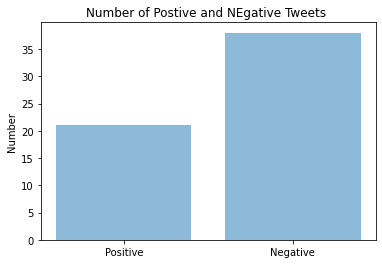

In [7]:
# Visualizing the results
import matplotlib.pyplot as plt
import numpy as np
objects = ['Positive','Negative']
y_pos = np.arange(len(objects))

plt.bar(y_pos,[total_pos,total_neg],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Number of Postive and NEgative Tweets ')
plt.show()

